In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import os
from joblib import load, dump

In [3]:

print(os.getcwd())

/Users/ashutoshthapa/Documents/ai_health_prediction_models


In [4]:
heart_disease=pd.read_csv('/Users/ashutoshthapa/Documents/ai_health_prediction_models/heart_2020_cleaned.csv')

In [5]:
heart_disease = heart_disease[:3000]

In [6]:
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Yes,28.70,No,No,No,30.0,30.0,Yes,Male,55-59,Black,No,No,Poor,6.0,No,No,No
2996,Yes,29.53,Yes,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,8.0,No,No,No
2997,No,32.28,No,No,Yes,0.0,1.0,No,Female,50-54,White,No,Yes,Very good,4.0,No,No,No
2998,No,24.78,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Good,6.0,No,No,No


In [7]:
heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
heart_disease.shape

(3000, 18)

In [9]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      3000 non-null   object 
 1   BMI               3000 non-null   float64
 2   Smoking           3000 non-null   object 
 3   AlcoholDrinking   3000 non-null   object 
 4   Stroke            3000 non-null   object 
 5   PhysicalHealth    3000 non-null   float64
 6   MentalHealth      3000 non-null   float64
 7   DiffWalking       3000 non-null   object 
 8   Sex               3000 non-null   object 
 9   AgeCategory       3000 non-null   object 
 10  Race              3000 non-null   object 
 11  Diabetic          3000 non-null   object 
 12  PhysicalActivity  3000 non-null   object 
 13  GenHealth         3000 non-null   object 
 14  SleepTime         3000 non-null   float64
 15  Asthma            3000 non-null   object 
 16  KidneyDisease     3000 non-null   object 


In [10]:
heart_disease['HeartDisease'].value_counts()

HeartDisease
No     2648
Yes     352
Name: count, dtype: int64

In [11]:
heart_disease['Race'].value_counts()

Race
White                             2127
Black                              728
Other                               56
Hispanic                            42
American Indian/Alaskan Native      33
Asian                               14
Name: count, dtype: int64

In [12]:
heart_disease['AgeCategory'].value_counts()

AgeCategory
65-69          406
60-64          318
70-74          316
80 or older    270
75-79          262
55-59          258
50-54          248
45-49          198
40-44          165
35-39          153
30-34          144
18-24          141
25-29          121
Name: count, dtype: int64

In [13]:
heart_disease.duplicated().sum()

1

In [14]:
heart_disease.drop_duplicates(inplace=True)

In [15]:
heart_disease.shape

(2999, 18)

In [16]:
import seaborn as sns

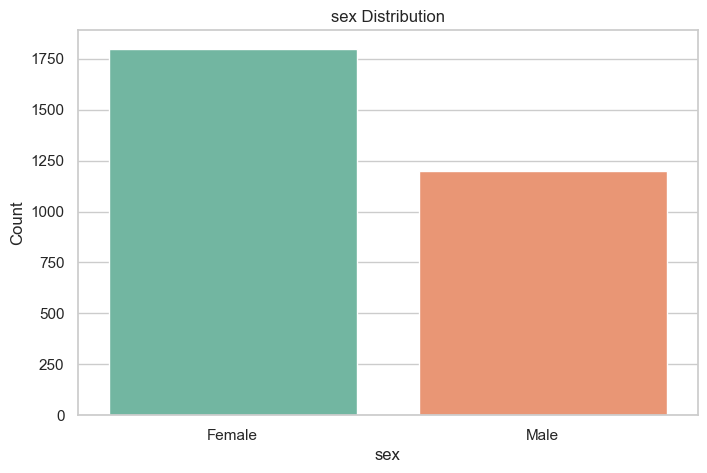

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))


sns.countplot(data=heart_disease, x="Sex", palette="Set2")
plt.title("sex Distribution")
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()

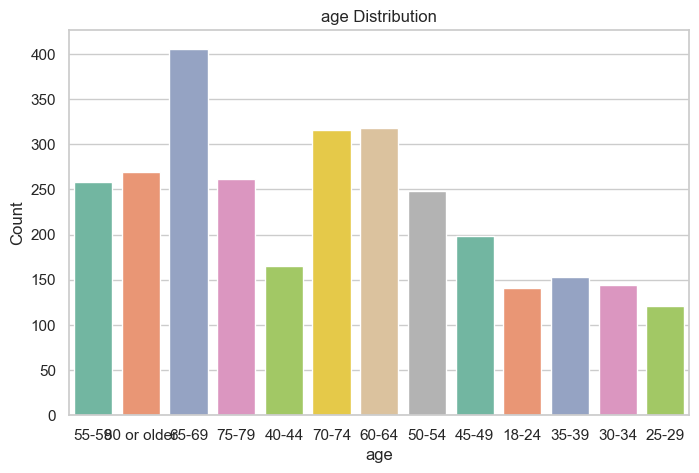

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))


sns.countplot(data=heart_disease, x="AgeCategory", palette="Set2")
plt.title("age Distribution")
plt.xlabel("age")
plt.ylabel("Count")
plt.show()

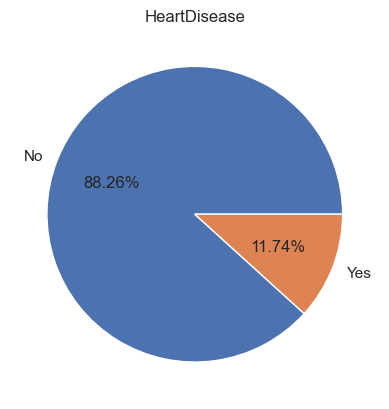

In [19]:
plt.pie(x=heart_disease['HeartDisease'].value_counts(),autopct='%1.2f%%',labels=heart_disease['HeartDisease'].value_counts().index)
plt.title('HeartDisease')
plt.show()

In [20]:
cols_encode = ['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                  'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
                  'KidneyDisease', 'SkinCancer', 'HeartDisease','Race','AgeCategory']

In [21]:
label=LabelEncoder()

In [22]:
for i in cols_encode:
    heart_disease[i]=label.fit_transform(heart_disease[i])

In [23]:
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,28.70,0,0,0,30.0,30.0,1,1,7,2,0,0,3,6.0,0,0,0
2996,1,29.53,1,0,0,0.0,0.0,0,1,5,5,0,1,4,8.0,0,0,0
2997,0,32.28,0,0,1,0.0,1.0,0,0,6,5,0,1,4,4.0,0,0,0
2998,0,24.78,0,0,0,0.0,0.0,0,1,9,5,2,1,2,6.0,0,0,0


In [24]:
col = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [25]:
scaler=StandardScaler()

In [26]:
heart_disease[col]=scaler.fit_transform(heart_disease[col])

In [27]:
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.920871,1,0,0,-0.143506,3.194531,0,0,7,5,2,1,4,-1.288475,1,0,1
1,0,-1.352718,0,0,1,-0.486251,-0.492128,0,0,12,5,0,1,4,-0.057662,0,0,0
2,0,-0.404785,1,0,0,1.798716,3.194531,0,1,9,5,2,1,1,0.557744,1,0,0
3,0,-0.764817,0,0,0,-0.486251,-0.492128,0,0,11,5,0,0,2,-0.673069,0,0,1
4,0,-0.840773,0,0,0,2.712702,-0.492128,1,0,4,5,0,1,4,0.557744,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,-0.082730,0,0,0,2.941199,3.194531,1,1,7,2,0,0,3,-0.673069,0,0,0
2996,1,0.043357,1,0,0,-0.486251,-0.492128,0,1,5,5,0,1,4,0.557744,0,0,0
2997,0,0.461116,0,0,1,-0.486251,-0.369240,0,0,6,5,0,1,4,-1.903882,0,0,0
2998,0,-0.678227,0,0,0,-0.486251,-0.492128,0,1,9,5,2,1,2,-0.673069,0,0,0


In [28]:
X=heart_disease.drop(columns=['HeartDisease'])
Y=heart_disease['HeartDisease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'saga'],
            'penalty': ['l1', 'l2']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVC': {
        'model': SVC(probability=True),  
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [31]:
best_model={}
for model_name,config in models.items():
   grid=GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=10,scoring='accuracy',n_jobs=-1)

In [32]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
best_model[model_name] = grid.best_estimator_
print("Best grid parameters:", grid.best_params_)
print(f"Best score for {model_name}: {grid.best_score_:.4f}\n")


Best grid parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVC: 0.8761



In [34]:
svc=SVC(C=0.1,gamma='scale',kernel='linear',probability=True)

In [35]:
adb = AdaBoostClassifier(base_estimator=svc)

In [36]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

In [37]:

grid_search=GridSearchCV(adb,param_grid,cv=5,scoring='accuracy')

In [38]:
grid_search.fit(X_train, y_train)

/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/ashutoshthapa/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=SVC(C=0.1,
                                                             kernel='linear',
                                                             probability=True)),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [86]:
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", round(grid_search.best_score_, 4))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best accuracy: 0.8771


In [40]:
adb_pred=grid_search.best_estimator_.predict(X_test)

In [41]:
adb_acc=accuracy_score(y_test,adb_pred)

In [42]:

print(f"Accuracy score:{adb_acc:.4f}")

Accuracy score:0.8949


In [43]:
best_model=grid_search.best_estimator_

In [44]:
import joblib

In [45]:
joblib.dump(best_model,'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [46]:
loaded_model = load('heart_disease_model.pkl')
predictions = loaded_model.predict(X_test)

In [47]:
predictions_acc=accuracy_score(y_test,predictions)

In [48]:
print(f"Accuracy score:{predictions_acc:.4f}")

Accuracy score:0.8949


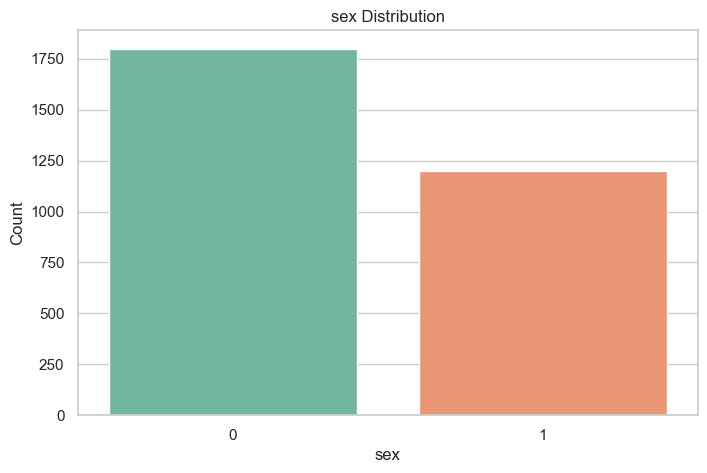

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))


sns.countplot(data=heart_disease, x="Sex", palette="Set2")
plt.title("sex Distribution")
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()